<a href="https://colab.research.google.com/github/Lineage-Reconstruction-DREAM-Challenge/C2_C3_training_data_performance/blob/master/compare_performance_on_C2_training_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compare the performance of methods on the challenge 2 training data.

by Wuming Gong


In [39]:
start_time0 <- Sys.time()

In [40]:
options(max.print=1000)

## Install and load R packages

In [41]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [42]:
required_packages <- c(
  'BiocManager', 
  'dplyr', 'ggplot2'
)

In [43]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

## Load R packages

In [44]:
library(dplyr)
library(ggplot2)

# Load the performance of each methods on the challenge 2 training data

These results were reported by each team.

In [45]:
files <- c(
  'Guan' = 'challenge=C2_group=GuanLab.tsv',
  'Liu' = 'challenge=C2_group=Jingyuan_Hu.tsv',
  'DCLEAR(KRD)' = 'challenge=C2_group=Kwak_Gong.v2.tsv',
  'DCLEAR(WHD)' = 'challenge=C2_group=Kwak_gong_weighted_hamming_TreeCmp.tsv',
  'Cassiopeia Greedy' = 'challenge=C2_group=MJ.tsv',
  'AMbeRland' = 'challenge=C2_group=AMbeRland.tsv'
)
remote_files <- sprintf('https://raw.githubusercontent.com/Lineage-Reconstruction-DREAM-Challenge/C2_C3_training_data_performance/master/%s', files)
names(remote_files) <- names(files)

In [46]:
d <- do.call('rbind', lapply(1:length(remote_files), function(i){
  x <- read.table(remote_files[i], header = TRUE, sep = '\t')
  cbind(x, method = names(remote_files)[i])
}))  %>%
  mutate(method = factor(method, names(files)))

In [47]:
head(d)

,sample,rf,triplet,method
,<int>,<dbl>,<dbl>,<fct>
1,1,0.7158,0.7417,Guan
2,2,0.7363,0.5543,Guan
3,3,0.6034,0.5931,Guan
4,4,0.6443,0.7805,Guan
5,5,0.6545,0.8522,Guan
6,6,0.7158,0.7299,Guan


## Visualize the performance

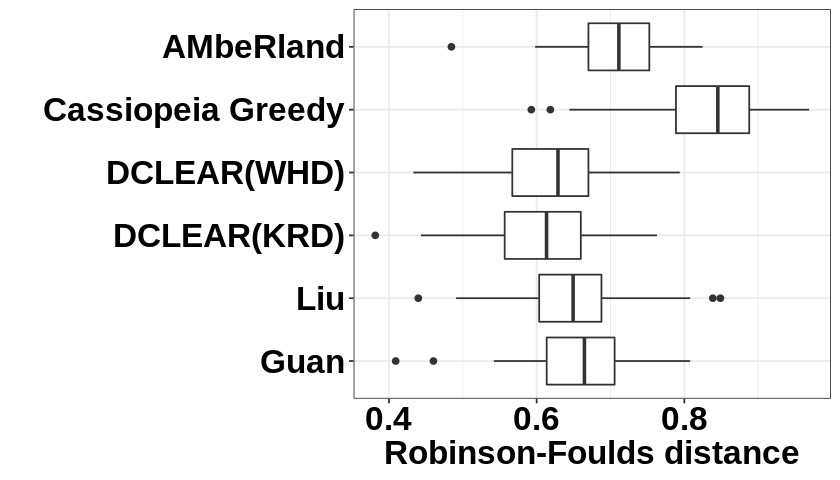

In [48]:
options(repr.plot.width = 7, repr.plot.height = 4)
d %>%
  ggplot(aes(x = method, y = rf)) + 
  geom_boxplot() +
  coord_flip() + 
  theme_bw() +
  xlab('') + ylab('Robinson-Foulds distance') +
  theme(axis.text = element_text(size = 20, face = 'bold', color="black")) +  
  theme(axis.title = element_text(size = 20, face = 'bold', color = 'black'))

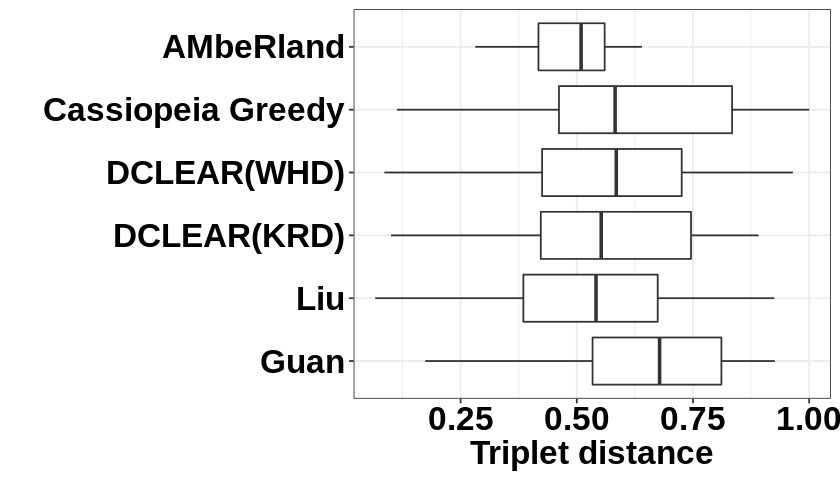

In [49]:
options(repr.plot.width = 7, repr.plot.height = 4)
d %>%
  ggplot(aes(x = method, y = triplet)) + 
  geom_boxplot() +
  coord_flip() + 
  theme_bw() +
  xlab('') + ylab('Triplet distance') +
  theme(axis.text = element_text(size = 20, face = 'bold', color="black")) +  
  theme(axis.title = element_text(size = 20, face = 'bold', color = 'black'))

## SessionInfo

In [50]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.3.2 dplyr_1.0.2  

loaded via a namespace (and not attached):
 [1] magrittr_2.0.1   munsell_0.5.0    tidyselect_1.1.0 uuid_0.1-4      
 [5] colorspace_2.0-0 R6_2.5.0         rlang_0.4.9      tools_4.0.3     
 [9] grid_4.0.3       gtable_0.3.0     withr_2.3

In [51]:
Sys.time() - start_time0

Time difference of 4.752624 secs